In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("vgsales.csv")
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


In [5]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")


In [6]:
df = df.dropna(subset=["Name", "Genre", "Platform", "Year"])


In [7]:
df = df.drop_duplicates()


In [8]:
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


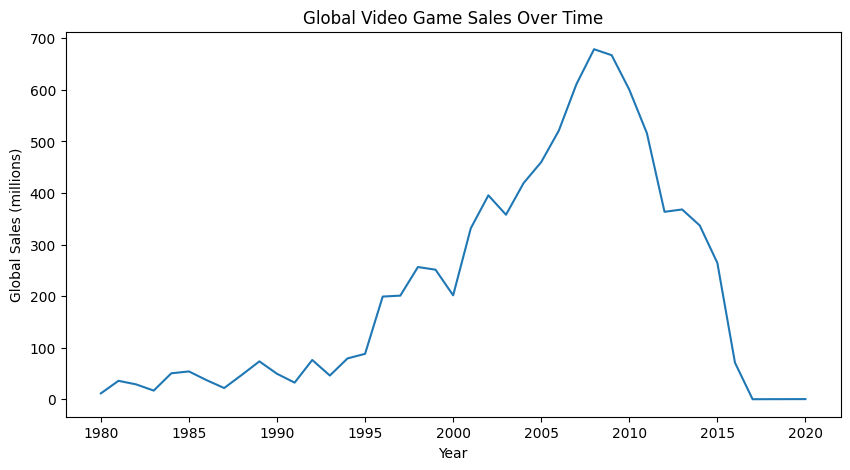

In [9]:
sales_by_year = df.groupby("Year")["Global_Sales"].sum()

plt.figure(figsize=(10,5))
plt.plot(sales_by_year.index, sales_by_year.values)
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.title("Global Video Game Sales Over Time")
plt.show()


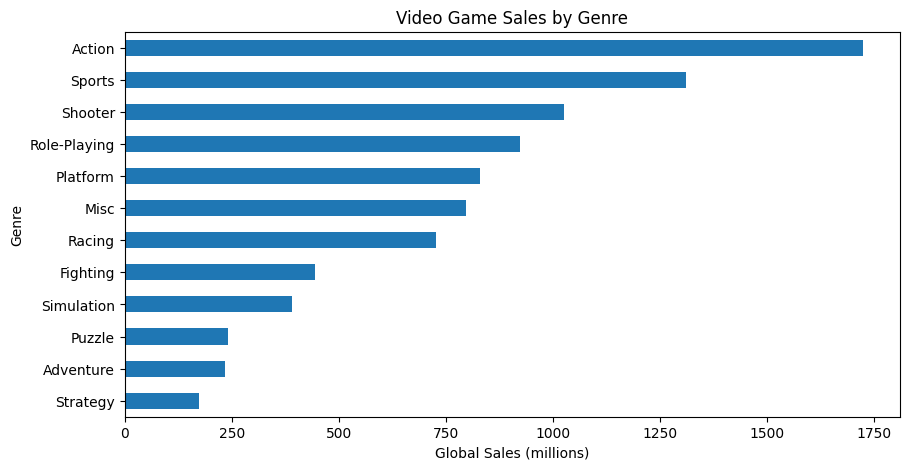

In [10]:
genre_sales = df.groupby("Genre")["Global_Sales"].sum().sort_values()

plt.figure(figsize=(10,5))
genre_sales.plot(kind="barh")
plt.xlabel("Global Sales (millions)")
plt.title("Video Game Sales by Genre")
plt.show()


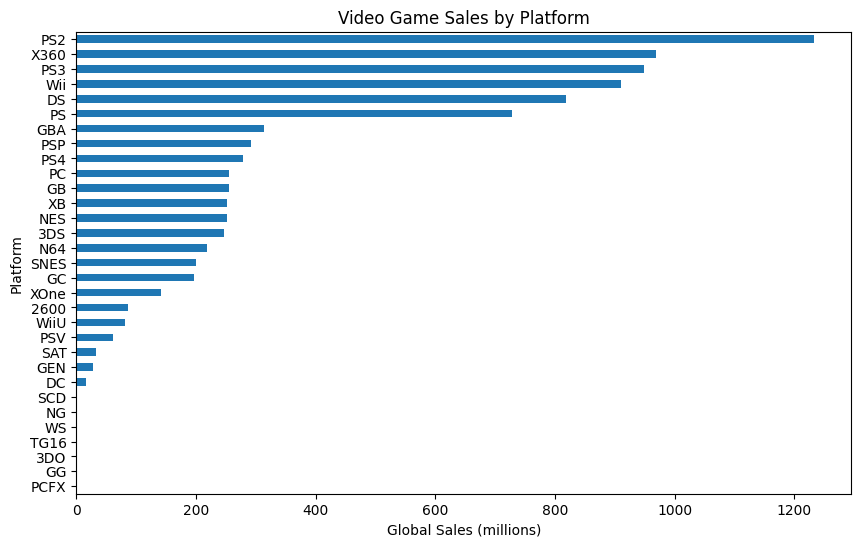

In [11]:
platform_sales = df.groupby("Platform")["Global_Sales"].sum().sort_values()

plt.figure(figsize=(10,6))
platform_sales.plot(kind="barh")
plt.xlabel("Global Sales (millions)")
plt.title("Video Game Sales by Platform")
plt.show()


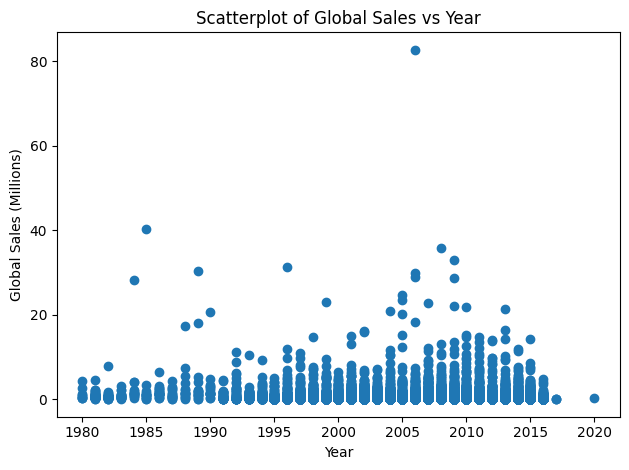

In [14]:
plt.figure()
plt.scatter(df['Year'], df['Global_Sales'])
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.title('Scatterplot of Global Sales vs Year')
plt.tight_layout()
plt.show()

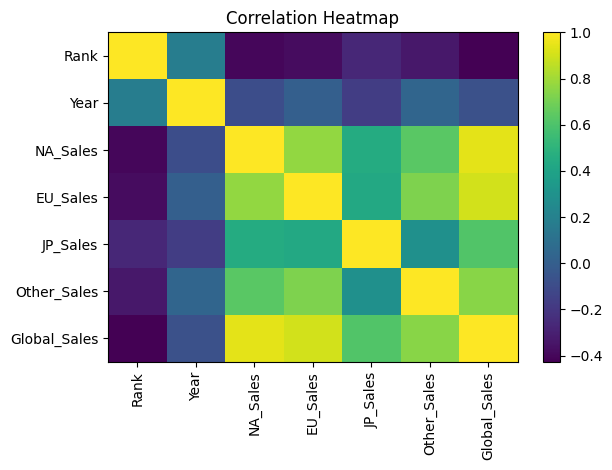

In [15]:
plt.figure()
corr = df.corr(numeric_only=True)
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

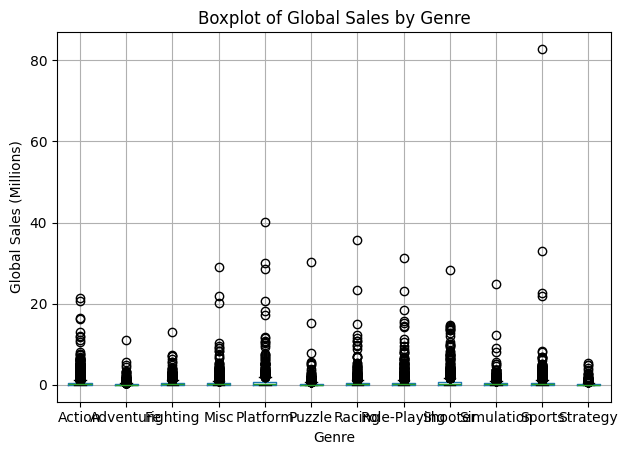

In [16]:
plt.figure()
df.boxplot(column='Global_Sales', by='Genre')
plt.title('Boxplot of Global Sales by Genre')
plt.suptitle('')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.tight_layout()
plt.show()

In [17]:
df.to_csv("vgsales_clean.csv", index=False)
